# My Solution to Exercise 1

In [1]:
import numpy as np
from scipy.stats import uniform, norm
import matplotlib.pyplot as plt
from matplotlib import rc
from sympy import *

## Part 1: Using Uniform  over $[0, \frac{\pi}{2}]$

In [2]:
# Set-up LaTeX font
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [3]:
# Define parameters
n = 250 # number of random variables
k = 100000 # number of draws from the distribution

In [4]:
# Define distribution
distribution = uniform(loc = 0, scale = 0 + np.pi/2)

In [5]:
# Set-up experiment and draw from distribution
X = distribution.rvs((k, n))
mu, s = distribution.mean(), distribution.std()

In [6]:
# Calcuate row-wise means
sample_means = np.mean(X, axis = 1)

In [7]:
# Set-up function g(x) = sin(x), g'(x) = cos(x)
x = Symbol('x')
g = sin(x)
g_l = lambdify(x, g, 'numpy')

gprime = g.diff(x)
gprime_l = lambdify(x,gprime,'numpy')

In [8]:
# Calculate converging distribution
Y = np.sqrt(n)*(g_l(sample_means) - g_l(mu))

In [9]:
# Find distribution of convergent normal obtained using the delta method
mu_n = 0
s_n = np.sqrt((gprime_l(mu)**2)*(s**2))
N = norm(loc = mu_n, scale = s_n)

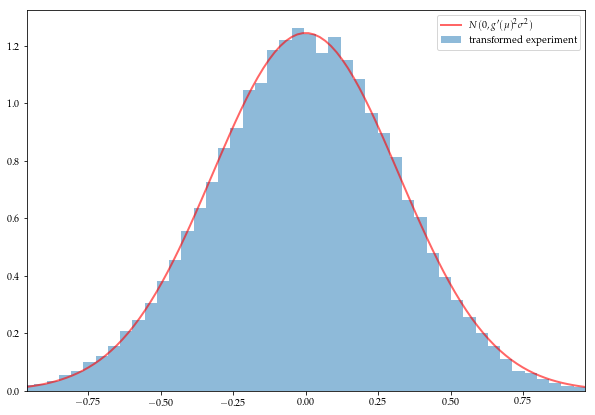

In [10]:
# Plot the resultant distributions
xmin, xmax = -3*s_n, 3*s_n
xgrid = np.linspace(xmin, xmax, 100)

fig, ax = plt.subplots(figsize=(10, 7))
ax.set_xlim(xmin,xmax)
ax.plot(xgrid, N.pdf(xgrid), 'r-', lw=2, alpha=0.6, label=r"$N(0, g'(\mu)^2  \sigma^2)$")
ax.hist(Y, bins=60, alpha=0.5, normed=True, label = 'transformed experiment')
ax.legend()
plt.show()

## Part 2: Using Uniform over $[0, \pi]$

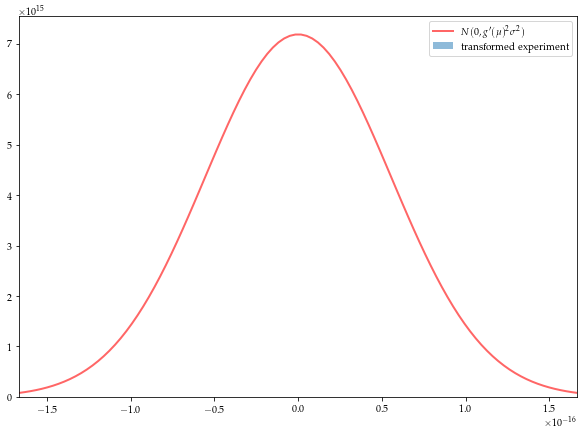

In [11]:
# Define parameters
n = 250 # number of random variables
k = 100000 # number of draws from the distribution

# Define distribution
distribution = uniform(loc = 0, scale = 0 + np.pi)

# Set-up experiment and draw from distribution
X = distribution.rvs((k, n))
mu, s = distribution.mean(), distribution.std()

# Calcuate row-wise means
sample_means = np.mean(X, axis = 1)

# Set-up function g(x) = sin(x), g'(x) = cos(x)
x = Symbol('x')
g = sin(x)
g_l = lambdify(x, g, 'numpy')

gprime = g.diff(x)
gprime_l = lambdify(x,gprime,'numpy')

# Calculate converging distribution
Y = np.sqrt(n)*(g_l(sample_means) - g_l(mu))

# Find distribution of convergent normal obtained using the delta method
mu_n = 0
s_n = np.sqrt((gprime_l(mu)**2)*(s**2))
N = norm(loc = mu_n, scale = s_n)

# Plot the resultant distributions
xmin, xmax = -3*s_n, 3*s_n
xgrid = np.linspace(xmin, xmax, 100)

fig, ax = plt.subplots(figsize=(10, 7))
ax.set_xlim(xmin,xmax)
ax.plot(xgrid, N.pdf(xgrid), 'r-', lw=2, alpha=0.6, label=r"$N(0, g'(\mu)^2  \sigma^2)$")
ax.hist(Y, bins=60, alpha=0.5, normed=True, label = 'transformed experiment')
ax.legend()
plt.show()

g'(x) = 0 so the Delta Method fails

# Text Solution to Exercise 1

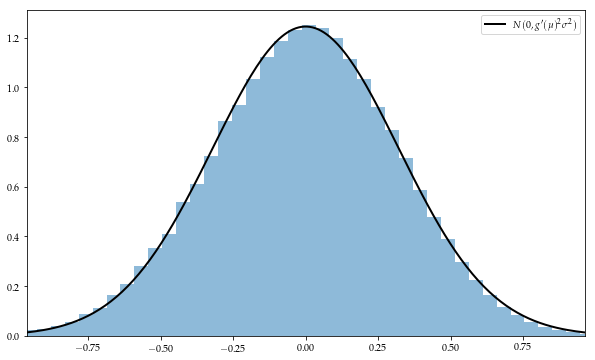

In [12]:
"""
Illustrates the delta method, a consequence of the central limit theorem.
"""

from scipy.stats import uniform, norm
from matplotlib import rc

# == Specifying font, needs LaTeX integration == #
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

# == Set parameters == #
n = 250
replications = 100000
distribution = uniform(loc=0, scale=(np.pi / 2))
mu, s = distribution.mean(), distribution.std()

g = np.sin
g_prime = np.cos

# == Generate obs of sqrt{n} (g(\bar X_n) - g(\mu)) == #
data = distribution.rvs((replications, n))
sample_means = data.mean(axis=1)  # Compute mean of each row
error_obs = np.sqrt(n) * (g(sample_means) - g(mu))

# == Plot == #
asymptotic_sd = g_prime(mu) * s
fig, ax = plt.subplots(figsize=(10, 6))
xmin = -3 * g_prime(mu) * s
xmax = -xmin
ax.set_xlim(xmin, xmax)
ax.hist(error_obs, bins=60, alpha=0.5, normed=True)
xgrid = np.linspace(xmin, xmax, 200)
lb = r"$N(0, g'(\mu)^2  \sigma^2)$"
ax.plot(xgrid, norm.pdf(xgrid, scale=asymptotic_sd), 'k-', lw=2, label=lb)
ax.legend()
plt.show()

# My Solution to Exercise 2

## Part 1. Show that if $\mathbf{Q}$ is the inverse square root of $\mathbf \Sigma$, then 
$$
\mathbf{Z_n} := \sqrt{n} \mathbf{Q} ( \bar{\mathbf X}_n - \boldsymbol \mu )
\stackrel{d}{\to}
\mathbf Z \sim N(\mathbf 0, \mathbf I)
$$

By assumption, 

$$ 
\mathbf{Y_n}
\stackrel{d}{\to}
\mathbf Y \sim N(\mathbf 0, \mathbf \Sigma)
$$

Where, 
$$
\mathbf{Y_n} := \sqrt{n}( \bar{\mathbf X}_n - \boldsymbol \mu )
$$

If $\mathbf Q$ is the inverse square root of $\mathbf \Sigma$, then $\mathbf Q$ is constant and a symmetric positive definite matrix with dimensions $k \times k$.

Since $\mathbf Q$ is constant and symmetric positive definite, and $\mathbf{Y_n} \stackrel{d}{\to} \mathbf Y \sim N(\mathbf 0, \mathbf \Sigma)$ as assumed, applying the continuous mapping theorem yields:

$$
\mathbf{Q} \mathbf{Y_n} \stackrel{d}{\to} \mathbf Q \mathbf Y
$$

Now,
$$
\mathbb{E} [ \mathbf Q \mathbf Y ] = \mathbf Q \mathbb{E} [ \mathbf Y ] = \mathbf Q \boldsymbol \mu  = \mathbf 0
$$
And,
$$
\mathrm{Var}[\mathbf Q \mathbf Y] = \mathbf Q \mathrm{Var}[\mathbf Y] \mathbf Q' = \mathbf Q \Sigma \mathbf Q' = \mathbf I
$$
So, $\mathbf Z = \mathbf Q \mathbf Y \sim N(\mathbf 0, \mathbf I)$, as desired.

## Part 2. Illustrate the convergence:
$$
n \| \mathbf Q ( \bar{\mathbf X}_n - \boldsymbol \mu ) \|^2
\stackrel{d}{\to}
\chi^2(k)
$$

In [1]:
import numpy as np
from scipy.stats import chi2, uniform
from scipy.linalg import sqrtm, inv
import matplotlib.pyplot as plt
from matplotlib import rc
from sympy import *

In [2]:
# Set-up LaTeX font
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [3]:
# Define parameters
n = 250 # number of random variable samples
k = 50000 # number of draws from the distribution
v = 2 # number of variables within sample

In [4]:
# Define distributions and obtain means
distW = uniform(loc = -1, scale = 2)
muW = distW.mean()
distU = uniform(loc = -2, scale = 4)
muU = distU.mean()

mu = [[muU],
      [muU + muW]]
mu = np.asarray(mu)
mu.shape = (2,)

In [5]:
# Set-up experiment and draw from distribution

X = np.empty((k, n, v)) # multi-dimensionsal array with the variables of X_n available through the 3rd index
var1 = distW.rvs((k, n))
var2 = var1 + distU.rvs((k, n))
X[:k, :n, 0] = var1
X[:k, :n, 1] = var2 
#Y = np.empty((k,n))
#for i in range(k):
#    for j in range(n):
#        Y[i,j] = X[i,j,:].flatten()
# X_bar = np.average(X, axis = 1) # average across samples

In [65]:
cov_k = []
Q_k = []
X_bar_k = []
Z_k = []
ZN_k = []
for i in range(k):
    v0 = X[i,:,0]  - mu[0]
    v1 = X[i,:,1] - mu[1]
    cov = np.cov(v0,v1)
    cov_k.append(cov)
    Q = inv(sqrtm(cov))
    Q_k.append(Q)
    X_bar = np.average(X[i,:,:], axis = 0)
    X_bar_k.append(X_bar)
    Z = np.sqrt(n)*Q@(X_bar - mu)
    Z_k.append(Z)
    ZN = Z.T@Z
    ZN_k.append(ZN)

In [70]:
Z = np.asarray(ZN_k)

In [72]:
C = chi2(2)

In [74]:
s_c = C.std()

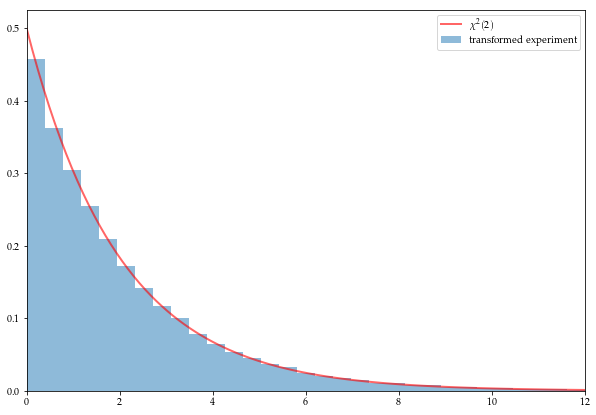

In [82]:
# Plot the resultant distributions
xmin, xmax = 0, 6*s_c
xgrid = np.linspace(xmin, xmax, 100)

fig, ax = plt.subplots(figsize=(10, 7))
ax.set_xlim(xmin,xmax)
ax.plot(xgrid, C.pdf(xgrid), 'r-', lw=2, alpha=0.6, label=r"$\chi^{2}(2)$")
ax.hist(Z, bins=60, alpha=0.5, normed=True, label = 'transformed experiment')
ax.legend()
plt.show()